In [143]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from scipy import stats as st
import warnings
warnings.filterwarnings("ignore")

In [144]:
# Importing feature engineered dataset
stroke_data = pd.read_csv(r"C:\Users\asharm\Desktop\DAX-DS-Assignment-2022-Ashish_Sharma\venv\FeatureEngineered_StrokesDataset.csv")
stroke_data.head(5)

,Unnamed: 0,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,...,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,hypertension_heart_patient,age_range
0,0,9046,1.369759,0,1,2.706375,1.776626,1,0,1,...,0,0,0,1,0,1,0,0,0,bin-1
1,1,51676,1.063914,0,0,2.121559,0.166435,1,1,0,...,1,0,1,0,0,0,1,0,0,bin-1
2,2,31112,0.248327,0,1,-0.005028,0.999946,1,0,1,...,0,0,1,0,0,0,1,0,0,NaN
3,3,60182,0.452224,0,0,1.437358,1.359871,1,1,0,...,0,0,0,1,0,0,0,1,0,NaN
4,4,1665,0.248327,1,0,1.501184,-0.610245,1,1,0,...,1,0,1,0,0,0,1,0,0,NaN


In [145]:
# dropping the age_range feature
stroke_data = stroke_data.drop(['age_range'], axis = 1)

Text(0.5, 1.0, 'Patients rate of stroke')

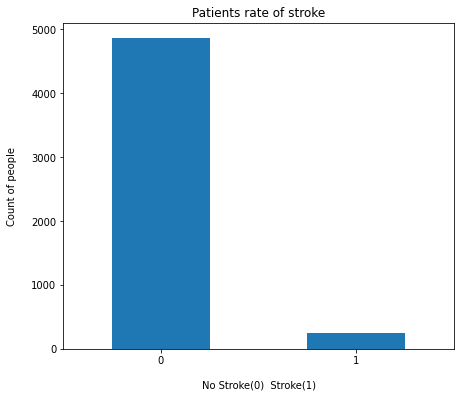

In [146]:
# Plotting for class imbalance
stroke_data['stroke'].value_counts().plot(kind = 'bar', figsize = (7,6), rot = 0)
plt.xlabel("No Stroke(0)  Stroke(1)", labelpad = 14)
plt.ylabel("Count of people", labelpad = 14)
plt.title("Patients rate of stroke")

In [147]:
xtrain = stroke_data
labels = stroke_data["stroke"]

In [148]:
# Splitting dataset into train, test, cv
from sklearn.model_selection import train_test_split

x, x_test, y, y_test = train_test_split(xtrain,labels,test_size=0.2,train_size=0.8)
x_train, x_cv, y_train, y_cv = train_test_split(x,y,test_size = 0.25,train_size =0.75)

In [149]:
y_train.value_counts()

0    2922
1     144
Name: stroke, dtype: int64

Performing oversampling for avoiding baising the model 

In [150]:
import imblearn

In [151]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()

# fit predictor and target variable
x_train, y_train = smote.fit_resample(x_train, y_train)


In [152]:
# dataset balanced
y_train.value_counts()

1    2922
0    2922
Name: stroke, dtype: int64

Logistic Regression is choosen because it is binary classification problem and the dimentionality of the feature vector is also low

In [153]:
# Training base logistic regression model
from sklearn.linear_model import LogisticRegression
lr_basemodel =LogisticRegression()
lr_basemodel.fit(x_train,y_train)

LogisticRegression()

In [154]:
# Predicting against cross validation dataset
y_pred_cv = lr_basemodel.predict(x_cv)

In [155]:
from sklearn.metrics import f1_score
print("f1 score for base model is : " , f1_score(y_cv,y_pred_cv))

f1 score for base model is :  1.0


<AxesSubplot:>

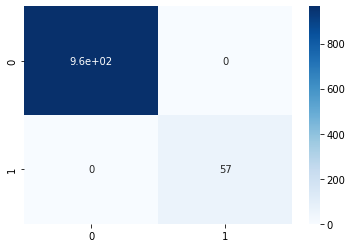

In [156]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_cv, y_pred_cv)
ax1 = plt.subplot()
sns.heatmap(cm, annot = True, cmap = 'Blues', ax = ax1)

In [157]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

In [158]:
from sklearn.model_selection import StratifiedKFold
lr=LogisticRegression()
param= {'C': [0.1, 0.5, 1,10,15,20], 'penalty': ['l1', 'l2']}
# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)
#Gridsearch for hyperparam tuning
model= GridSearchCV(estimator= lr,param_grid=param,scoring="f1",cv=folds,return_train_score=True)
#train model to learn relationships between x and y
model.fit(x_train,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.1, 0.5, 1, 10, 15, 20],
                         'penalty': ['l1', 'l2']},
             return_train_score=True, scoring='f1')

In [159]:
print("Best F1 score: ", model.best_score_)
print("Best hyperparameters: ", model.best_params_)

Best F1 score:  0.9998289136013687
Best hyperparameters:  {'C': 1, 'penalty': 'l2'}


In [160]:
lr2=LogisticRegression(C=1,penalty="l2")
lr2.fit(x_train,y_train)

LogisticRegression(C=1)

In [161]:
y_pred_cv = lr2.predict(x_cv)

In [162]:
from sklearn.metrics import f1_score
print("f1 score for base model is : " , f1_score(y_cv,y_pred_cv))

f1 score for base model is :  1.0


<AxesSubplot:>

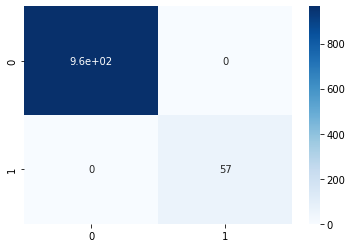

In [163]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_cv, y_pred_cv)
ax1 = plt.subplot()
sns.heatmap(cm, annot = True, cmap = 'Blues', ax = ax1)

In [164]:
# Results on test data

In [165]:
y_pred_test = lr2.predict(x_test)

In [166]:
from sklearn.metrics import f1_score
print("f1 score for base model is : " , f1_score(y_test,y_pred_test))

f1 score for base model is :  1.0


<AxesSubplot:>

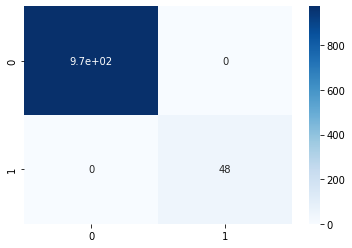

In [167]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_test)
ax1 = plt.subplot()
sns.heatmap(cm, annot = True, cmap = 'Blues', ax = ax1)

In [168]:
import pickle

In [169]:
pickle.dump(lr2, open('model.pkl', 'wb'))

In [170]:
pickled_model = pickle.load(open('model.pkl', 'rb'))
y_pred_test = pickled_model.predict(x_test)

In [171]:
print("f1 score for base model is : " , f1_score(y_test,y_pred_test))

f1 score for base model is :  1.0


In [172]:
type(y_pred_test)

numpy.ndarray

In [175]:
x_test['y_pred_test']= y_pred_test.tolist()

In [174]:
x_test.to_csv('Predicted_Stroke_csv.csv')